In [78]:
import os
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [69]:
# curr_dir = 'C:/Users/m294666/Documents/iezzi_data'
curr_dir = 'C:/Users/m294666/Documents/iezzi_data_10_10_23/Nevus_sample_images'

### Get number of images

In [70]:
# Function to count .jpg files in a directory and its subdirectories
def count_jpg_files(directory):
    jpg_count = 0
    
    for root, _, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(".jpg"):
                jpg_count += 1
                
    return jpg_count

main_folder = curr_dir

jpg_count = count_jpg_files(main_folder)
print(f"Number of .jpg files: {jpg_count}")

Number of .jpg files: 291


### Inspect an image

In [71]:
folder_no = 2
image_no = 1
sub_folders = os.listdir(curr_dir)
images = os.listdir(os.path.join(curr_dir,sub_folders[folder_no]))

# img_path = curr_dir+'/2693032/1.2.826.0.2.139953.1.2.50886.43962.34899.1393.jpg'
img_path = curr_dir+'/'+sub_folders[folder_no]+'/'+ images[image_no]
sub_folders

['10524631',
 '10617437',
 '12944653',
 '13013079',
 '2710264',
 '3420234',
 '3444046',
 '3448585',
 '4393598',
 '6005281',
 '7216345',
 '8401627',
 '9737827',
 '9878609',
 '9929298',
 'imagedata.json']

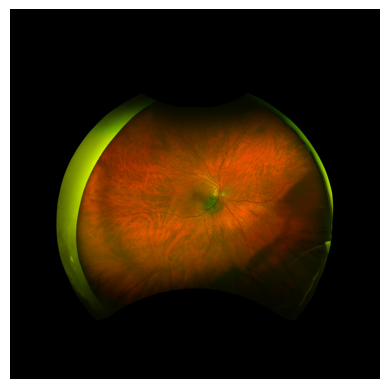

In [73]:
img = mpimg.imread(img_path)

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

### Data Preparation - Batch 1

In [201]:
data1 = pd.read_excel('C:/Users/m294666/Documents/iezzi_data/Nevus_sample_annotations_09-20-2023.xlsx')
data2 = pd.read_excel('C:/Users/m294666/Documents/iezzi_data_10_10_23/Nevus_sample_summary.xlsx')

In [202]:
data1.head()

,MRN,Last Name,First Name,Date of Birth,DFS,Race,Sex,Smoking status,History of cutaneous melanoma,Autoimmune disease,...,educ_level_num,educ_level,add_line_1,add_line_2,city,state_province,country,zip,home_phone,email_address
0,2693032,Vogel,Margaret,1947-01-19,2020-05-14,White,Female,Never,False,False,...,18.0,"MASTER'S DEGREE (E.G., MA, MS, MENG, MED...",3504 Fairway Ridge Ln SW Apt 116,NaN,Rochester,MINNESOTA,USA,55902,507-206-0749,margaretvogel414@gmail.com
1,3076201,Louters,Barbara,1930-03-28,2022-05-17,White,Female,Never,False,False,...,16.0,ASSOCIATE DEGREE: ACADEMIC PROGRAM,PO Box 34,NaN,Hollandale,MINNESOTA,USA,56045,507-383-1608,Bfbrouwer@hotmail.com
2,3171679,Huntley,Verlys,1934-11-27,2020-09-21,White,Female,Never,True,False,...,12.0,12TH GRADE,10516 720th Ave,NaN,Emmons,MINNESOTA,USA,56029,507-297-5546,vhuntley@wctatel.net
3,3198755,Castronvinci,Kathleen,1952-05-31,2022-02-16,White,Female,Never,False,False,...,16.0,ASSOCIATE DEGREE: ACADEMIC PROGRAM,8480 Franlo Rd Apt 507,NaN,Eden Prairie,MINNESOTA,USA,55344,507-398-6894,kle1952@yahoo.com
4,4079944,Pell,Gene,1949-12-31,2020-02-11,White,Male,Never,False,False,...,12.0,12TH GRADE,15099 505th Ave,NaN,Austin,MINNESOTA,USA,55912,507-437-3093,pellco@live.com


In [127]:
data1['Date of Birth'] = pd.to_datetime(data1['Date of Birth'])
data1['DFS'] = pd.to_datetime(data1['DFS'])

# Calculate the age by subtracting 'birthdate' from 'date_first_seen' and divide by 365 days to get years
data1['age'] = ((data1['DFS'] - data1['Date of Birth']).dt.days / 365).astype('int32')

In [128]:
data1.head()

,MRN,Last Name,First Name,Date of Birth,DFS,Race,Sex,Smoking status,History of cutaneous melanoma,Autoimmune disease,...,educ_level,add_line_1,add_line_2,city,state_province,country,zip,home_phone,email_address,age
0,2693032,Vogel,Margaret,1947-01-19,2020-05-14,White,Female,Never,False,False,...,"MASTER'S DEGREE (E.G., MA, MS, MENG, MED...",3504 Fairway Ridge Ln SW Apt 116,NaN,Rochester,MINNESOTA,USA,55902,507-206-0749,margaretvogel414@gmail.com,73
1,3076201,Louters,Barbara,1930-03-28,2022-05-17,White,Female,Never,False,False,...,ASSOCIATE DEGREE: ACADEMIC PROGRAM,PO Box 34,NaN,Hollandale,MINNESOTA,USA,56045,507-383-1608,Bfbrouwer@hotmail.com,92
2,3171679,Huntley,Verlys,1934-11-27,2020-09-21,White,Female,Never,True,False,...,12TH GRADE,10516 720th Ave,NaN,Emmons,MINNESOTA,USA,56029,507-297-5546,vhuntley@wctatel.net,85
3,3198755,Castronvinci,Kathleen,1952-05-31,2022-02-16,White,Female,Never,False,False,...,ASSOCIATE DEGREE: ACADEMIC PROGRAM,8480 Franlo Rd Apt 507,NaN,Eden Prairie,MINNESOTA,USA,55344,507-398-6894,kle1952@yahoo.com,69
4,4079944,Pell,Gene,1949-12-31,2020-02-11,White,Male,Never,False,False,...,12TH GRADE,15099 505th Ave,NaN,Austin,MINNESOTA,USA,55912,507-437-3093,pellco@live.com,70


In [186]:
print(f'Data shape: {data1.shape}')

Data shape: (15, 62)


In [203]:
data1_cols_new = pd.read_excel('C:/Users/m294666/Documents/iezzi_data/230929_Ch_Nevus_deleted_items_to_ignore.xlsx')

data1_cols_new = list(data1_cols_new.columns)

data1_cols_old = list(data1.columns)

# columns_to_del = [
#     'Last Name','First Name','History of cutaneous melanoma','Autoimmune disease','Vitiligo',''
# ]
len(data1_cols_new)

62

In [204]:
cols_to_remove = [item for item in data1_cols_new + data1_cols_old if item not in data1_cols_new or item not in data1_cols_old]

In [205]:
cols_to_remove

['Last Name',
 'First Name',
 'Smoking status',
 'History of cutaneous melanoma',
 'Autoimmune disease',
 'Vitiligo',
 'History of renal cell carcinoma',
 'History of mesothelioma',
 'History of cancer',
 'Type of cancer',
 'Family history of cancer',
 'Family hx ch mm',
 'Family hx cutaneous mm',
 'Family history renal cell',
 'Family history mesothelioma',
 'Family history other cancer',
 'Welder occupation',
 'OD Retinal invasion',
 'OD RPE invasion',
 'OD Sentinel vessel',
 'OS Retinal invasion',
 'OS RPE invasion',
 'OS Sentinel vessel',
 'OCTA done',
 'Good photos',
 'Additional diagnosis',
 'iop_age',
 'iop_visit_mean_od',
 'iop_visit_mean_os',
 'va_dist_best_age',
 'vaod_dist_best_snellen',
 'vaod_dist_best_logmar',
 'vaos_dist_best_snellen',
 'vaos_dist_best_logmar',
 'pat_name',
 'birth_date',
 'sex',
 'gender',
 'race',
 'ethnicity',
 'educ_level_num',
 'educ_level',
 'add_line_1',
 'add_line_2',
 'city',
 'state_province',
 'country',
 'zip',
 'home_phone',
 'email_address'

In [206]:
data1 = data1.drop(columns = cols_to_remove)
data1.head()

,MRN,Date of Birth,DFS,Race,Sex,Melanocytosis,Germline Bap1,Affected Eye,OD VA at DFS (Snellen),OD VA at DFS (logMAR),...,OS Orange pigment,OS CNVM,OS CB involvement,OS Iris involvement,OS Extraocular extension,OS RPE trough,OS Internal reflectivity,OS Cytology,OS Prior treatment,OS Date prior treatment
0,2693032,1947-01-19,2020-05-14,White,Female,False,False,Right,20/20,NaN,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
1,3076201,1930-03-28,2022-05-17,White,Female,False,False,Left,NaN,NaN,...,False,False,False,False,False,False,High,NaN,NaN,NaN
2,3171679,1934-11-27,2020-09-21,White,Female,False,False,Right,20/60,NaN,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
3,3198755,1952-05-31,2022-02-16,White,Female,False,False,Left,NaN,NaN,...,False,False,False,False,False,False,High,NaN,NaN,NaN
4,4079944,1949-12-31,2020-02-11,White,Male,False,False,Both,20/20,NaN,...,False,False,False,False,False,False,Medium,NaN,NaN,NaN


In [207]:
def get_row(row):

    row = row.reset_index()

    # Create a new DataFrame using the first column as column names
    new_dataframe = pd.DataFrame(columns=row.iloc[:, 0])

    # Add the second column as the first row in the new DataFrame
    new_dataframe.loc[0] = row.iloc[:, 1].tolist()

    return new_dataframe

new_data1 = pd.DataFrame(columns=data1.columns)

# Iterate through the rows of the original DataFrame
for index, row in data1.iterrows():
    
    row_pd = get_row(row)
    
    if row['Affected Eye'] == 'Both':
        
        # Create a duplicate row with 'Left'
        left_row = row_pd.copy()
        left_row['Affected Eye'] = 'Left'

        # Create a duplicate row with 'Right'
        right_row = row_pd.copy()
        right_row['Affected Eye'] = 'Right'

        # Append both duplicate rows to the new DataFrame
        new_data1 = pd.concat([new_data1,left_row, right_row], axis=0, ignore_index=True)
    else:
        row_normal = row_pd.copy()
#         If 'Affected Eye' is not 'Both', simply add the row to the new DataFrame
        new_data1 = pd.concat([new_data1,row_normal], axis=0, ignore_index=True)

# The new_df DataFrame now contains the desired changes.
new_data1

C:\Users\m294666\AppData\Local\Temp\ipykernel_13168\506383602.py:35: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  new_data1 = pd.concat([new_data1,row_normal], axis=0, ignore_index=True)
C:\Users\m294666\AppData\Local\Temp\ipykernel_13168\506383602.py:35: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  new_data1 = pd.concat([new_data1,row_normal], axis=0, ignore_index=True)
C:\Users\m294666\AppData\Local\Temp\ipykernel_13168\506383602.py:35: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  new_data1 = pd.concat([new_data1,row_normal], axis=0, ignore_index=True)
C:\Users\m294666\AppData\Local\Temp\ipykernel_131

,MRN,Date of Birth,DFS,Race,Sex,Melanocytosis,Germline Bap1,Affected Eye,OD VA at DFS (Snellen),OD VA at DFS (logMAR),...,OS Orange pigment,OS CNVM,OS CB involvement,OS Iris involvement,OS Extraocular extension,OS RPE trough,OS Internal reflectivity,OS Cytology,OS Prior treatment,OS Date prior treatment
0,2693032,1947-01-19,2020-05-14,White,Female,False,False,Right,20/20,NaN,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
1,3076201,1930-03-28,2022-05-17,White,Female,False,False,Left,NaN,NaN,...,False,False,False,False,False,False,High,NaN,NaN,NaN
2,3171679,1934-11-27,2020-09-21,White,Female,False,False,Right,20/60,NaN,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
3,3198755,1952-05-31,2022-02-16,White,Female,False,False,Left,NaN,NaN,...,False,False,False,False,False,False,High,NaN,NaN,NaN
4,4079944,1949-12-31,2020-02-11,White,Male,False,False,Left,20/20,NaN,...,False,False,False,False,False,False,Medium,NaN,NaN,NaN
5,4079944,1949-12-31,2020-02-11,White,Male,False,False,Right,20/20,NaN,...,False,False,False,False,False,False,Medium,NaN,NaN,NaN
6,4328976,1951-09-08,2021-10-19,White,Male,False,False,Left,NaN,NaN,...,False,False,False,False,False,False,High,NaN,NaN,NaN
7,5233583,1937-04-23,2023-05-04,White,Female,False,False,Right,20/25,NaN,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
8,6206368,1949-02-24,2020-10-22,White,Female,False,False,Left,NaN,NaN,...,False,False,False,False,False,False,Medium,NaN,NaN,NaN
9,7360758,2012-12-21,2021-01-20,White,Male,False,False,Right,20/40,NaN,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN


In [194]:
for index,row in new_data1.iterrows():
    row_pd = get_row(row)
    break
row_pd.columns
od_columns = [col for col in row_pd.columns if col.startswith('OD')]

od_columns

cleaned_columns = [col.replace('OD ', '') for col in od_columns]

['OD VA at DFS (Snellen)',
 'OD VA at DFS (logMAR)',
 'OD IOP at DFS',
 'OD Largest tumor quadrant',
 'OD Largest tumor posterior margin',
 'OD Largest tumor anterior margin',
 'OD Largest tumor diameter (mm)',
 'OD Largest tumor thickness (mm)',
 'OD Distance to ON (mm)',
 'OD Distance to fov (mm)',
 'OD Tumor shape',
 "OD Bruch's rupture",
 'OD Color',
 'OD SRF Extent',
 'OD Halo',
 'OD SRF in fov',
 'OD Drusen',
 'OD Orange pigment',
 'OD CNVM',
 'OD CB involvement',
 'OD Iris involvement',
 'OD Extraocular extension',
 'OD RPE trough',
 'OD Internal reflectivity',
 'OD Cytology',
 'OD Prior treatment',
 'OD Date prior treatment']

In [195]:
data1.columns

Index(['MRN', 'Date of Birth', 'DFS', 'Race', 'Sex', 'Melanocytosis',
       'Germline Bap1', 'Affected Eye', 'OD VA at DFS (Snellen)',
       'OD VA at DFS (logMAR)', 'OD IOP at DFS', 'OD Largest tumor quadrant',
       'OD Largest tumor posterior margin', 'OD Largest tumor anterior margin',
       'OD Largest tumor diameter (mm)', 'OD Largest tumor thickness (mm)',
       'OD Distance to ON (mm)', 'OD Distance to fov (mm)', 'OD Tumor shape',
       'OD Bruch's rupture', 'OD Color', 'OD SRF Extent', 'OD Halo',
       'OD SRF in fov', 'OD Drusen', 'OD Orange pigment', 'OD CNVM',
       'OD CB involvement', 'OD Iris involvement', 'OD Extraocular extension',
       'OD RPE trough', 'OD Internal reflectivity', 'OD Cytology',
       'OD Prior treatment', 'OD Date prior treatment',
       'OS VA at DFS (Snellen)', 'OS VA at DFS (logMAR)', 'OS IOP at DFS',
       'OS Largest tumor quadrant', 'OS Largest tumor posterior margin',
       'OS Largest tumor anterior margin', 'OS Largest tumor dia

In [200]:
data2.columns

Index(['pat_mrn', 'exam_date', 'iop_date', 'iop_age', 'iop_visit_mean_od',
       'iop_visit_mean_os', 'comment', 'va_dist_best_date', 'va_dist_best_age',
       'va_dist_best_line', 'vaod_dist_best_snellen', 'vaod_dist_best_logmar',
       'vaos_dist_best_snellen', 'vaos_dist_best_logmar',
       'vaou_dist_best_snellen', 'epic_id', 'pat_name', 'birth_date', 'sex',
       'gender', 'race', 'ethnicity', 'educ_level_num', 'educ_level',
       'add_line_1', 'add_line_2', 'city', 'state_province', 'country', 'zip',
       'home_phone', 'email_address'],
      dtype='object')

# Training pipeline for nevus detector

#### utils.py

In [ ]:
import torch
from torchvision import transforms
from torch.utils.data import DataLoader, random_split
from dataloader import CustomDataset
import torch.nn as nn
import torch.sigmoid
from sklearn.metrics import roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

def transform(image, image_size=224):
    """
    Preprocess and transform the input image.
    
    Args:
        image (PIL Image): The input image.
        image_size (int): Size to which the image is resized.
        
    Returns:
        torch.Tensor: Transformed image tensor.
    """
    preprocess = transforms.Compose([
        transforms.Resize((image_size, image_size)),
        transforms.ToTensor(),
    ])
    
    return preprocess(image)

def create_train_val_test_loaders(excel_file, batch_size, train_ratio=0.8, val_ratio=0.1, test_ratio=0.1, image_size=224):
    """
    Create train, validation, and test data loaders based on provided ratios.

    Args:
        excel_file (str): Path to the Excel file.
        batch_size (int): Number of samples in each batch.
        train_ratio (float): Ratio of training data.
        val_ratio (float): Ratio of validation data.
        test_ratio (float): Ratio of test data.
        image_size (int): Size to which the image is resized.

    Returns:
        train_loader, val_loader, test_loader: DataLoader instances for train, validation, and test datasets.
    """
    dataset = CustomDataset(excel_file, image_size=image_size)
    
    # Calculate data split sizes
    total_samples = len(dataset)
    train_size = int(train_ratio * total_samples)
    val_size = int(val_ratio * total_samples)
    test_size = total_samples - train_size - val_size
    
    # Split the dataset into train, validation, and test sets
    train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])
    
    # Create DataLoader instances for train, validation, and test datasets
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    
    return train_loader, val_loader, test_loader

def evaluate(model, dataloader, criterion, device):
    """
    Evaluate a model using a DataLoader.

    Args:
        model: The binary classification model.
        dataloader: DataLoader for validation or test data.
        criterion: Loss function (e.g., BCEWithLogitsLoss).
        device: The device on which to perform the evaluation (e.g., "cuda" or "cpu").

    Returns:
        loss: The average loss over the data.
        accuracy: The accuracy of the model on the data.
        auroc: The Area Under the Receiver Operating Characteristic (AUROC) score.
        predicted_labels: List of predicted labels (0 or 1) for the data.
        image_paths: List of file paths for the data.
    """
    model.eval()
    total_loss = 0
    correct = 0
    total = 0
    predicted_labels = []
    image_paths = []

    with torch.no_grad():
        for images, labels, paths in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            predicted = (torch.sigmoid(outputs) > 0.5).float()
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
            predicted_labels.extend(predicted.cpu().numpy())
            image_paths.extend(paths)

    loss = total_loss / len(dataloader)
    accuracy = correct / total

    return loss, accuracy, predicted_labels, image_paths

def calculate_auroc(labels, predicted_labels):
    """
    Calculate the Area Under the Receiver Operating Characteristic (AUROC) score.

    Args:
        labels: Ground truth labels (0 or 1).
        predicted_labels: Predicted labels (0 or 1) from the model.

    Returns:
        auroc: AUROC score.
    """
    auroc = roc_auc_score(labels, predicted_labels)
    return auroc

def plot_and_save_losses_accuracies(train_losses, val_losses, train_accuracies, val_accuracies, save_dir):
    """
    Plot train and validation losses and accuracies and save the plots.

    Args:
        train_losses (list): List of training losses.
        val_losses (list): List of validation losses.
        train_accuracies (list): List of training accuracies.
        val_accuracies (list): List of validation accuracies.
        save_dir (str): Directory to save the plots.
    """
    plt.figure(figsize=(12, 5))

    # Plot Losses
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Losses')

    # Plot Accuracies
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Training Accuracy')
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracies')

    # Save the plots
    save_path = f"{save_dir}/losses_accuracies_plot.png"
    plt.savefig(save_path)
    print(f"Losses and accuracies plot saved at {save_path}")

# Example usage
train_losses = [0.2, 0.15, 0.1, 0.08, 0.05]
val_losses = [0.25, 0.2, 0.18, 0.16, 0.14]
train_accuracies = [0.92, 0.93, 0.94, 0.95, 0.96]
val_accuracies = [0.88, 0.89, 0.9, 0.91, 0.92]

#### dataloader.py

In [ ]:
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from utils import transform

class CustomDataset(Dataset):
    def __init__(self, excel_file, image_size=224):
        """
        Custom dataset for loading images and labels from an Excel file.

        Args:
            excel_file (str): Path to the Excel file containing image paths and labels.
            image_size (int): Size to which the image is resized.
        """
        self.data = pd.read_excel(excel_file)
        self.image_size = image_size
        self.file_paths = self.data.iloc[:, 0].values  # Assumes the file paths are in the first column.
        self.labels = self.data.iloc[:, 1].values  # Assumes the labels are in the second column.
        self.targets = self.labels.tolist()  # Store the labels in the 'targets' attribute.

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path, label = self.data.iloc[idx]
        image = Image.open(img_path)  # Load image using the file path
        image = transform(image, self.image_size)
        label = torch.tensor(label, dtype=torch.float32)

        return image, label, img_path

#### train_test.py

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from dataloader import create_train_val_test_loaders
from model import YourBinaryClassifierModel  # Replace with your actual model
from utils import transform

def train(model, train_loader, val_loader, test_loader, num_epochs, learning_rate):
    
    device = torch.device("cuda" if torch.cuda.is available() else "cpu")
    model.to(device)

    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    best_val_loss = float("inf")
    best_model = None
    train_losses, train_accuracies, val_losses, val_accuracies = [], [], [], []
    test_image_paths, test_predicted_labels = [], []

    for epoch in range(num_epochs):
        
        model.train()
        total_loss = 0
        correct_train = 0
        total_train = 0

        for images, labels, _ in train_loader:
            
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

            predicted = (torch.sigmoid(outputs) > 0.5).float()
            correct_train += (predicted == labels).sum().item()
            total_train += labels.size(0)

        train_loss = total_loss / len(train_loader)
        train_accuracy = correct_train / total_train

        # Validation
        val_loss, val_accuracy, _, _ = evaluate(model, val_loader, criterion, device)

        print(f"Epoch [{epoch + 1}/{num_epochs}] - Train Loss: {avg_train_loss:.4f} - Train Accuracy: {train_accuracy:.4f} - Validation Loss: {avg_val_loss:.4f} - Validation Accuracy: {val_accuracy:.4f}")

        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            best_model = model.state_dict()

    # Testing
    model.load_state_dict(best_model)
    model.eval()

    test_loss, _, test_predicted_labels, test_image_paths = evaluate(model, test_loader, criterion, device)
    auroc = calculate_auroc(test_loader.dataset.targets, test_predicted_labels)
    print(f"Test AUROC: {auroc:.4f} - Batch Size: {batch_size}, Learning Rate: {learning_rate}")

    return best_model, train_losses, train_accuracies, val_losses, val_accuracies, test_image_paths, test_predicted_labels

def main():
    
    # Setting the environment variable to store pretrained model
    os.environ['TORCH_HOME'] = '/insert/directory'
    
    excel_file = 'your_dataset.xlsx'
    batch_size = 32
    num_epochs = 10
    learning_rate = 0.001

    train_loader, val_loader, test_loader = create_train_val_test_loaders(excel_file, batch_size)

    model = YourBinaryClassifierModel()  # Replace with your actual model
    best_model_weights, train_losses, train_accuracies, val_losses, val_accuracies, test_image_paths, test_predicted_labels = train(model, train_loader, val_loader, test_loader, num_epochs, learning_rate)

    # Save the trained model weights to a file
    torch.save(best_model_weights, 'best_model_weights.pth')
    
    # Plot and save train/val losses and accuracies
    save_directory = "your_save_directory"
    plot_and_save_losses_accuracies(train_losses, val_losses, train_accuracies, val_accuracies, save_directory)

if __name__ == "__main__":
    main()